In [1]:
import os
import pickle
from glob import glob
import numpy as np
import torch
import pandas as pd
from fsl.data.image import Image
from fsl.utils.image.resample import resampleToPixdims
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
path = 'T1_GM_to_template_GM_mod.pkl'
data = pd.read_pickle(path)
data.head()

,min,max,mean,med,std,1p,25p,75p,99p,norm99p
21708942,0.0,2.420837,0.101878,0.0,0.266274,0.0,0.0,0.0,1.140766,11.197367
23425368,0.0,2.046221,0.098715,0.0,0.263562,0.0,0.0,0.0,1.160693,11.758011
22943860,0.0,5.515918,0.097194,0.0,0.270624,0.0,0.0,0.0,1.167051,12.007388
24837551,0.0,6.008175,0.102574,0.0,0.277265,0.0,0.0,0.0,1.157759,11.287023
25243303,0.0,2.167876,0.102531,0.0,0.266408,0.0,0.0,0.0,1.144126,11.158818


In [3]:
def get_array(df,col):
    return df.loc[:][col].values

def stats_calc(df,col):
    arr = get_array(df,col)
    return np.min(arr), np.max(arr), np.mean(arr), np.median(arr), np.std(arr)

def plot_hist(df, col, title=None):
    array = get_array(df, col)
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ax.grid(axis='y', alpha = 0.75, b=True, which='major', linestyle='-')
    ax.hist(array, bins=50, color='blue', alpha=0.7, rwidth=0.85)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
#     plt.title(title)
    fig.patch.set_facecolor('xkcd:white')
    _,_,mean,_,std = stats_calc(df, col)
    if col == 'min':
        thr = mean - 2 * std
    elif col=='max':
        thr = mean + 2 * std
    if col == 'min' or col =='max':
        ax.axvline(x=thr, color='r', linestyle='dashed', linewidth=2)
    else:
        ax.axvline(x=mean, color='r', linestyle='dashed', linewidth=2)
#     plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, facecolor='none', bbox_inches="tight")

def plot_bars(df, labels_list, title=None):
    array_list = get_array(df,labels_list)
#     fig = plt.figure(figsize=(8,6))
    fig, ax = plt.subplots(figsize=(8,6))
#     ax.set_title(title)
    ax.grid(axis='y', alpha = 0.75)
    ax.boxplot(array_list)
    ax.set_xticklabels(labels_list)
    # ax.set_xticklabels(['0', '1', '2','3','4','5', '25', '50', '75','95', '96', '97','98','99', '100'])
    plt.xlabel('Percentile')
    plt.ylabel('Values')
    plt.grid(axis='y', alpha = 0.75)
    fig.patch.set_facecolor('xkcd:white')
    # plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, facecolor='none', bbox_inches="tight")
    plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+' UKBB'+'.png')

In [4]:
print('Stats (min, max, mean, med, std) for MIN: ', stats_calc(data, 'min'))
print('Stats (min, max, mean, med, std) for MAX: ', stats_calc(data, 'max'))
print('Stats (min, max, mean, med, std) for NORM99p: ', stats_calc(data, 'norm99p'))

Stats (min, max, mean, med, std) for MIN:  (-0.032236456871032715, 0.0, -6.899778872676679e-07, 0.0, 0.0001491374075655921)
Stats (min, max, mean, med, std) for MAX:  (1.762822151184082, 6.52615213394165, 2.5133352586125444, 2.392561912536621, 0.5211904423920668)
Stats (min, max, mean, med, std) for NORM99p:  (9.885284004211421, 14.875106353759765, 11.219165726413447, 11.16514099121093, 0.487893419448761)


In [5]:
_,_,mean,_,std = stats_calc(data, 'min')
print(mean-2*std)
_,_,mean,_,std = stats_calc(data, 'max')
print(mean+2*std)

-0.00029896479301845183
3.555716143396678


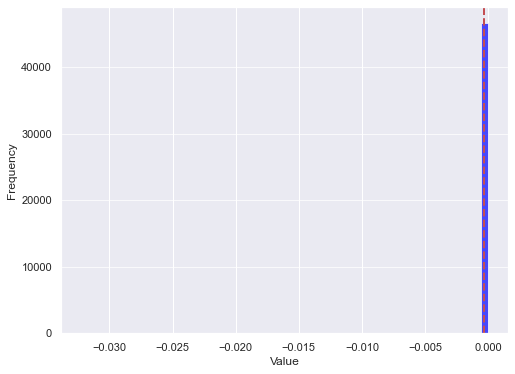

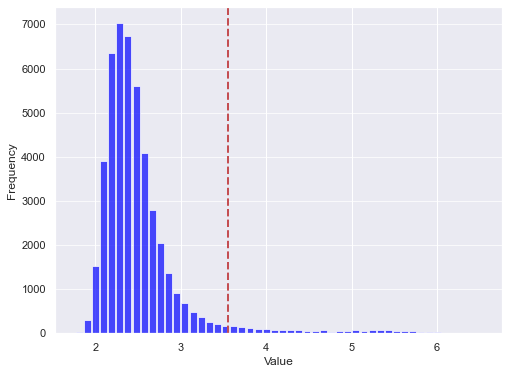

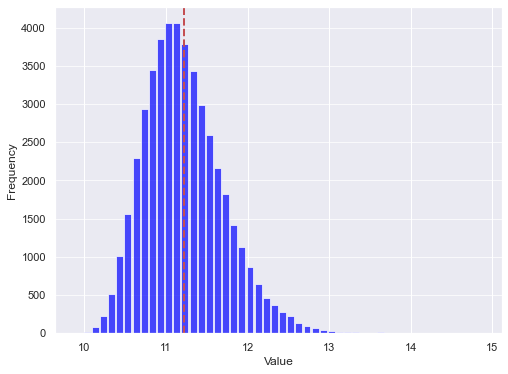

In [6]:
plot_hist(data, 'min', title='vbm_Min_Value_Distribution')
plot_hist(data, 'max', title='vbm_Max_Value_Distribution')
plot_hist(data, 'norm99p', title='vbm_norm99p_Value_Distribution')

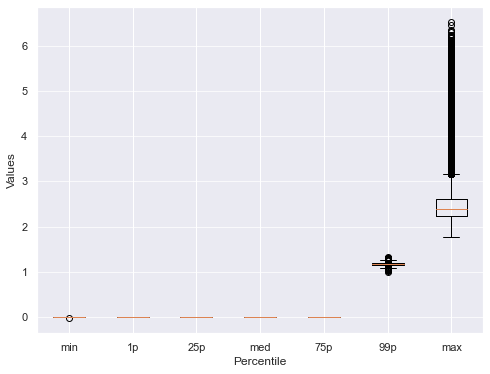

In [7]:
plot_bars(data, ['min', '1p', '25p', 'med', '75p','99p', 'max'], 'vbm_Voxel_Intensity_Value_Distribution')

In [8]:
data['min_corrected'] = data['min'] / data['mean']
data['max_corrected'] = data['max'] / data['mean']

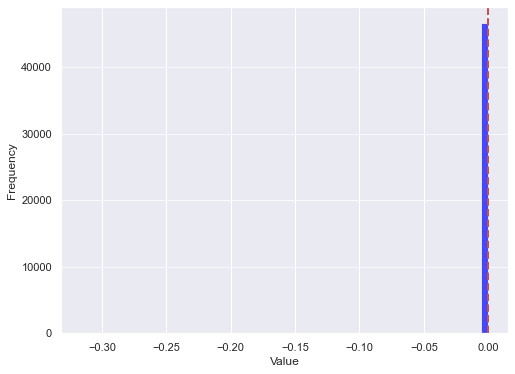

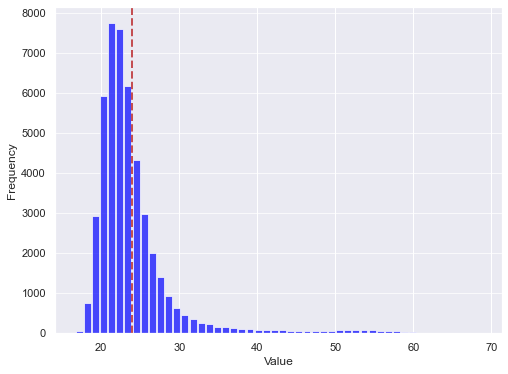

In [9]:
plot_hist(data, 'min_corrected', title='misc')
plot_hist(data, 'max_corrected', title='misc')

In [10]:
data['min_norm'] = data['min_corrected'] / np.mean(data['norm99p'])
data['max_norm'] = data['max_corrected'] / np.mean(data['norm99p'])

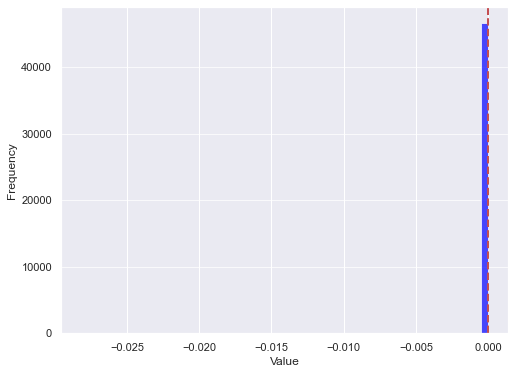

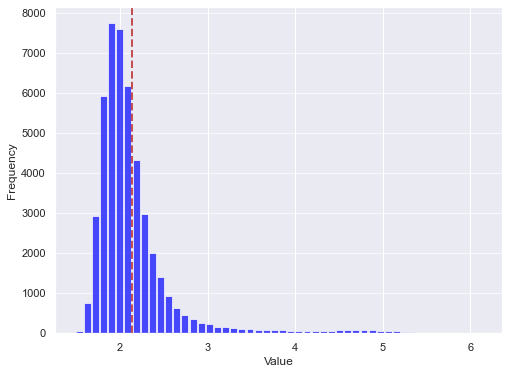

In [11]:
plot_hist(data, 'min_norm', title='misc')
plot_hist(data, 'max_norm', title='misc')

In [12]:
min_scale = data['min'].mean() - data['min'].std()*2
max_scale = data['max'].mean() + data['max'].std()*2
data_scale = max(abs(min_scale), abs(max_scale))
print(data_scale)

data['min_scaled'] = data['min'] / data_scale
data['max_scaled'] = data['max'] / data_scale

3.5557272989543303


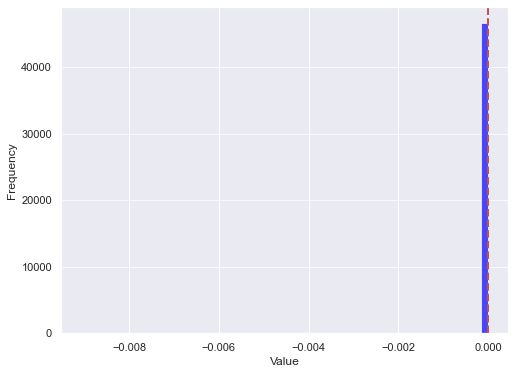

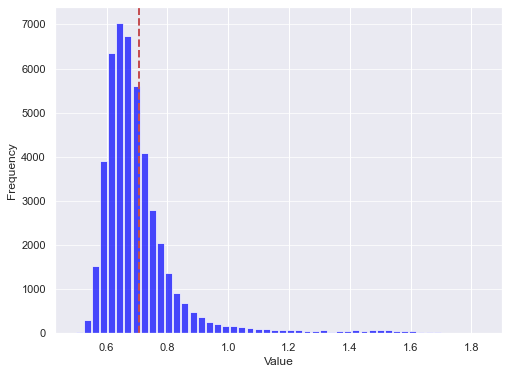

In [13]:
plot_hist(data, 'min_scaled', title='misc')
plot_hist(data, 'max_scaled', title='misc')